## Figure 2 - InSAR observations at Shinmoedake from ALOS-1

In [2]:
## Earthquake number distribution

%matplotlib inline
import os
import numpy as np
from datetime import timedelta, datetime as dt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt, ticker, dates as mdates
from scipy.io import loadmat
from mintpy.defaults.plot import *
from mintpy.utils import utils as ut, ptime, plot as pp, readfile
from mintpy import view

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/notebooks/Shinmoe_data')
os.chdir(work_dir)
print('Go to directory', work_dir)

# Common settings
phreatic_dates = ['20080822', '20100710'] # start/end date of phreatic events
magmatic_dates = ['20110119']             # start date of magmatic events

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/notebooks/Shinmoe_data


In [3]:
## Read InSAR displacement

# ALOS Asc T424
print('ascending 424')
data_dir1 = os.path.expanduser('~/insarlab/Kirishima/ShinmoeAlosAT424/mintpy')
lat1, lon1 = 31.9143, 130.8810

vel_file1 = os.path.join(data_dir1, 'velocity.h5')
ts_file1 = os.path.join(data_dir1, 'timeseries_ERA5_ramp_demErr.h5')
ex_dates1 = ptime.date_list2vector(ptime.read_date_list(os.path.join(data_dir1, 'exclude_date.txt')))[0]
atr1 = readfile.read_attribute(vel_file1)
y1, x1 = ut.coordinate(atr1).geo2radar(lat1, lon1)[0:2]
dates1, dis1 = ut.read_timeseries_lalo(lat1, lon1, ts_file1, unit='cm')
unw_file1 = os.path.join(data_dir1, '{}.unw'.format(atr1['DATE12']))
print('date12:', atr1['DATE12'])

# ALOS Desc T73
print('descending 73')
data_dir2 = os.path.expanduser('~/insarlab/Kirishima/ShinmoeAlosDT73/mintpy')
lat2, lon2 = 31.9121, 130.8854

vel_file2 = os.path.join(data_dir2, 'velocity.h5')
ts_file2 = os.path.join(data_dir2, 'timeseries_ERA5_ramp_demErr.h5')
ex_dates2 = ptime.date_list2vector(ptime.read_date_list(os.path.join(data_dir2, 'exclude_date.txt')))[0]
atr2 = readfile.read_attribute(vel_file2)
y2, x2 = ut.coordinate(atr2).geo2radar(lat2, lon2)[0:2]
dates2, dis2 = ut.read_timeseries_lalo(lat2, lon2, ts_file2, unit='cm')
unw_file2 = os.path.join(data_dir2, '{}.unw'.format(atr2['DATE12']))
print('date12:', atr2['DATE12'])

ascending 424
input lat / lon: 31.9143 / 130.881
date12: 20080929_20100520
descending 73
input lat / lon: 31.9121 / 130.8854
date12: 20081012_20100302


view.py /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520.unw --lalo-loc 1 0 1 0  --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 --dem /Users/yunjunz/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84 --contour-step 100 --contour-smooth 0.0  -c RdBu -v -6 1 -u cm  --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar  --scalebar 0.25 0.15 0.2 --scalebar-pad 0.1 --alpha 0.7  --ref-yx 7 205 
run view.py in MintPy release version v1.1.2-103, release date 2019-07-26
input file is roipac .unw file: /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520.unw in float32 format
file size in y/x: (217, 217)
num of datasets in file 20080929_20100520.unw: 1
datasets to exclude (0):
[]
datasets to display (1):
['']
data   coverage in y/x: (0, 0, 217, 217)
subset coverage in y/x: (18, 0, 216, 198)
data   coverage in lat/lon: (130.8498611111111, 31.94013888888889, 130.91013888888887, 31.87986111111111)
subset coverage in lat/lon: (130.8548611111111, 3

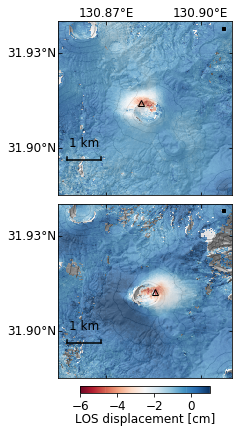

In [18]:
## Figure 2. (a-b) Map view of deformation from InSAR
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[3, 6], sharex=True)

# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84')
opt = ' --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c RdBu -v -6 1 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar '
opt += ' --scalebar 0.25 0.15 0.2 --scalebar-pad 0.1 --alpha 0.7 '
opt += ' --ref-yx {} {} '.format(atr1['REF_Y'], atr1['REF_X']) #use the same reference point as displacement time-seris
#opt += ' --noverbose '

# ALOS asc T424
cmd = 'view.py {f} --lalo-loc 1 0 1 0 {o}'.format(f=unw_file1, o=opt)
data1, atr, inps = view.prep_slice(cmd)
axs[0], inps, im, cbar = view.plot_slice(axs[0], data1, atr, inps)
axs[0].plot(lon1, lat1, "k^", mfc='none', mew=1., ms=6)

# ALOS desc T73
cmd = 'view.py {f} --lalo-loc 1 0 0 0 {o}'.format(f=unw_file2, o=opt)
data2, atr, inps = view.prep_slice(cmd)
axs[1], inps, im, cbar = view.plot_slice(axs[1], data2, atr, inps)
axs[1].plot(lon2, lat2, "k^", mfc='none', mew=1., ms=6)

fig.subplots_adjust(wspace=0.03, hspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.125)

# colorbar
cax = fig.add_axes([0.2, 0.09, 0.6, 0.015])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-6, -4, -2, 0, 2])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size, labelpad=0)

# output
out_file = os.path.abspath('dis_map.png')
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [15]:
## Read Number of EQ
num_eq_file = os.path.expanduser('~/Documents/Paper/2019_Kirishima/notebooks/data/EQ_num.txt')
txt_content = np.loadtxt(num_eq_file, dtype=bytes).astype(str)
eq_dates = np.array([dt.strptime(i, '%Y-%m-%d') for i in txt_content[:,0]])
eq_num = txt_content[:,1].astype(np.int16)

## Read GPS baseline change
gps_file = os.path.expanduser('~/Documents/Paper/2019_Kirishima/notebooks/data/len_960714_950486.mat')
gps_mat = loadmat(gps_file)
gps_lens = gps_mat['Len'].flatten() * 100.
gps_dates = [ptime.datenum2datetime(i) for i in gps_mat['T'].flatten()]
# start from zero
idx = gps_dates.index(dt(2005, 12, 15, 12, 0))
gps_lens -= gps_lens[idx]

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/notebooks/Shinmoe_data/dis_ts.png


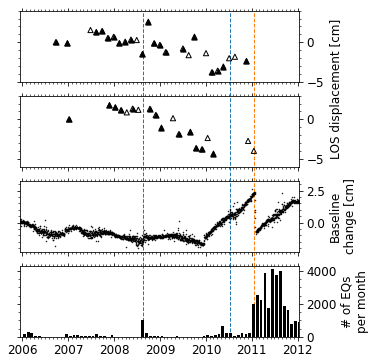

In [17]:
## Figure 2 (c-f) - Time-series of deformation from InSAR, GPS and number of earthquakes

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=[5, 6], sharex=True)

# 1 - asc time-series
axs[0].scatter(dates1, dis1, marker='^', edgecolor='k', facecolors='none', s=3**3)
for dt1 in dates1:
    if dt1 not in ex_dates1:
        axs[0].scatter(dt1, dis1[dates1==dt1], marker='^', edgecolor='k', facecolors='k', s=3**3)
axs[0].set_ylim([-5, 4])

# 2 - desc time-series
axs[1].scatter(dates2, dis2, marker='^', edgecolor='k', facecolors='none', s=3**3)
for dt2 in dates2:
    if dt2 not in ex_dates2:
        axs[1].scatter(dt2, dis2[dates2==dt2], marker='^', edgecolor='k', facecolors='k', s=3**3)    
axs[1].set_ylim([-6, 3])

pp.set_shared_ylabel(axs[0:2], label='LOS displacement [cm]', font_size=font_size, labelpad=0.88, position='right')

# 3 - GPS baseline
axs[2].scatter(gps_dates, gps_lens, marker='.', color='k', s=1**2)
axs[2].set_ylabel('Baseline\nchange [cm]', fontsize=font_size)

# 4 - number of earthquakes
axs[3].bar(eq_dates + timedelta(days=15), eq_num, width=22, color='k') #shift half a month to display
axs[3].set_ylabel('# of EQs\nper month', fontsize=font_size)

# plot event dates in dashed lines
event_dates = ptime.date_list2vector(['20080822', '20100710', '20110119'])[0]
line_colors = [pp.mplColors[0], pp.mplColors[0], pp.mplColors[1]]
for ax in axs:
    ymin = -0.2
    if ax == axs[-1]:
        ymin = 0
    for i in range(len(event_dates)):
        ax.axvline(x=event_dates[i], ymin=ymin, c=line_colors[i], linestyle='--', linewidth=1, zorder=0, clip_on=False)

# axes format
for ax in axs:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.tick_params(which='both', direction='out', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax.set_xlim(dt(2005, 12, 15), dt(2012, 1, 15))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[3].yaxis.set_major_locator(ticker.MultipleLocator(2000))

# output
out_file = os.path.abspath('dis_ts.png')
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

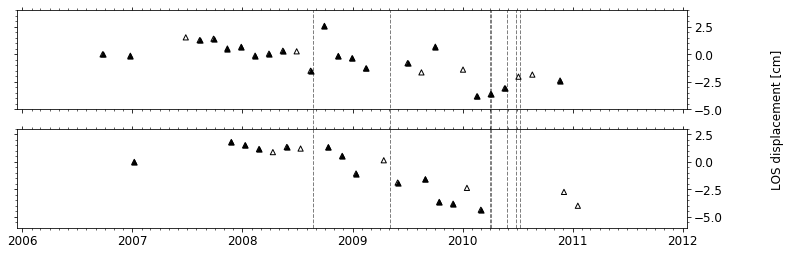

In [6]:
## Figure 2 (c-f) - Time-series of deformation from InSAR, GPS and number of earthquakes

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[12, 4], sharex=True)

# 1 - asc time-series
axs[0].scatter(dates1, dis1, marker='^', edgecolor='k', facecolors='none', s=3**3)
for dt1 in dates1:
    if dt1 not in ex_dates1:
        axs[0].scatter(dt1, dis1[dates1==dt1], marker='^', edgecolor='k', facecolors='k', s=3**3)
axs[0].set_ylim([-5, 4])

# 2 - desc time-series
axs[1].scatter(dates2, dis2, marker='^', edgecolor='k', facecolors='none', s=3**3)
for dt2 in dates2:
    if dt2 not in ex_dates2:
        axs[1].scatter(dt2, dis2[dates2==dt2], marker='^', edgecolor='k', facecolors='k', s=3**3)    
axs[1].set_ylim([-6, 3])

pp.set_shared_ylabel(axs[0:2], label='LOS displacement [cm]', font_size=font_size, labelpad=0.88, position='right')

# plot event dates in dashed lines
event_dates = ptime.date_list2vector(['20080822', '20100710', '20110119'])[0]
line_colors = [pp.mplColors[0], pp.mplColors[0], pp.mplColors[1]]

event_dates = ptime.date_list2vector(['20080822', '20100331','20100406','20090506','20100527','20100627','20100710'])[0]

for ax in axs:
    ymin = -0.2
    if ax == axs[-1]:
        ymin = 0
    for i in range(len(event_dates)):
        ax.axvline(x=event_dates[i], ymin=ymin, c='gray', linestyle='--', linewidth=1, zorder=0, clip_on=False)

# axes format
for ax in axs:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.tick_params(which='both', direction='out', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax.set_xlim(dt(2005, 12, 15), dt(2012, 1, 15))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# output
#out_file = os.path.abspath('dis_ts.png')
#print('save figure to file', out_file)
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()